In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas'

# load data

In [ ]:
df = pd.read_csv("/content/indian_liver_patient_dataset.csv")

# EDA

In [ ]:
df.head()

,Unnamed: 0,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  500 non-null    int64  
 1   Age                         500 non-null    int64  
 2   Gender                      500 non-null    object 
 3   Total_Bilirubin             500 non-null    float64
 4   Direct_Bilirubin            500 non-null    float64
 5   Alkaline_Phosphotase        500 non-null    int64  
 6   Alamine_Aminotransferase    500 non-null    int64  
 7   Aspartate_Aminotransferase  500 non-null    int64  
 8   Total_Protiens              500 non-null    float64
 9   Albumin                     500 non-null    float64
 10  Albumin_and_Globulin_Ratio  496 non-null    float64
 11  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 47.0+ KB


### we have missing values [?]

In [ ]:
df.describe()

,Unnamed: 0,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,496.000000,500.000000
mean,249.500000,44.5860,2.603800,1.117200,296.372000,82.736000,108.820000,6.44480,3.168800,0.960907,1.300000
std,144.481833,16.5334,5.120238,2.066709,257.461676,194.366775,307.093557,1.08902,0.799741,0.294289,0.458717
min,0.000000,4.0000,0.400000,0.100000,63.000000,10.000000,10.000000,2.70000,0.900000,0.300000,1.000000
25%,124.750000,32.7500,0.800000,0.200000,175.000000,23.000000,24.750000,5.70000,2.600000,0.795000,1.000000
50%,249.500000,45.0000,0.900000,0.300000,205.500000,33.500000,40.000000,6.50000,3.100000,1.000000,1.000000
75%,374.250000,58.0000,2.200000,1.000000,298.000000,59.250000,79.250000,7.20000,3.800000,1.100000,2.000000
max,499.000000,85.0000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.60000,5.500000,1.900000,2.000000


In [ ]:
df.shape

(500, 12)

In [ ]:
df['Liver_Problem'].value_counts()

1    350
2    150
Name: Liver_Problem, dtype: int64

In [ ]:
df.isnull()

,Unnamed: 0,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df["Albumin_and_Globulin_Ratio"].isna().any()

True

In [ ]:
df["Alkaline_Phosphotase"].isna().any()

False

In [ ]:
df["Gender"].isna().any()

False

In [ ]:
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
495,32,Male,0.7,0.2,165,31,29,6.1,3.0,0.96,2
496,24,Male,1.0,0.2,189,52,31,8.0,4.8,1.50,1
497,67,Male,2.2,1.1,198,42,39,7.2,3.0,0.70,1
498,68,Male,1.8,0.5,151,18,22,6.5,4.0,1.60,1


# build pipeline

In [ ]:
X = df.drop("Liver_Problem", axis=1)
y = df["Liver_Problem"]

In [ ]:
X = df.drop("Liver_Problem", axis=1)
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
495,32,Male,0.7,0.2,165,31,29,6.1,3.0,0.96
496,24,Male,1.0,0.2,189,52,31,8.0,4.8,1.50
497,67,Male,2.2,1.1,198,42,39,7.2,3.0,0.70
498,68,Male,1.8,0.5,151,18,22,6.5,4.0,1.60


In [ ]:
ct = ColumnTransformer(
    [
        ("impute_missing_values_on_Albumin_and_Globulin_Ratio", SimpleImputer(missing_values=np.nan, strategy="mean"), ["Albumin_and_Globulin_Ratio"]),
        ("LabelEncoder_for_gender", OneHotEncoder(), ["Gender"])
    ], remainder="passthrough"
                    )

In [ ]:
X = ct.fit_transform(X)


In [ ]:
X

array([[  0.9 ,   1.  ,   0.  , ...,  18.  ,   6.8 ,   3.3 ],
       [  0.74,   0.  ,   1.  , ..., 100.  ,   7.5 ,   3.2 ],
       [  0.89,   0.  ,   1.  , ...,  68.  ,   7.  ,   3.3 ],
       ...,
       [  0.7 ,   0.  ,   1.  , ...,  39.  ,   7.2 ,   3.  ],
       [  1.6 ,   0.  ,   1.  , ...,  22.  ,   6.5 ,   4.  ],
       [  0.6 ,   0.  ,   1.  , ...,  70.  ,   7.2 ,   2.9 ]])

# Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
X_train, X_test, y_train, y_test

(array([[  0.8,   0. ,   1. , ..., 187. ,   6.2,   2.8],
        [  0.8,   1. ,   0. , ...,  24. ,   4.4,   2. ],
        [  0.7,   0. ,   1. , ...,  79. ,   6.1,   2.7],
        ...,
        [  0.8,   0. ,   1. , ...,  68. ,   6.4,   2.9],
        [  0.6,   0. ,   1. , ...,  56. ,   7.4,   3. ],
        [  0.6,   0. ,   1. , ...,  38. ,   5.3,   2.1]]),
 array([[  0.8,   1. ,   0. , ..., 245. ,   6.8,   3.1],
        [  0.7,   1. ,   0. , ...,  28. ,   6.8,   2.9],
        [  0.8,   0. ,   1. , ...,  28. ,   5.5,   2.5],
        ...,
        [  0.9,   0. ,   1. , ...,  17. ,   6.3,   3. ],
        [  0.9,   1. ,   0. , ...,  13. ,   5.3,   2.6],
        [  1.2,   0. ,   1. , ..., 127. ,   5.5,   3.1]]),
 161    1
 72     1
 246    1
 230    2
 391    1
       ..
 63     1
 326    2
 337    1
 11     1
 351    1
 Name: Liver_Problem, Length: 400, dtype: int64,
 18     1
 361    2
 104    1
 4      1
 156    1
       ..
 224    1
 401    1
 69     2
 228    2
 212    2
 Name: Liver_Prob

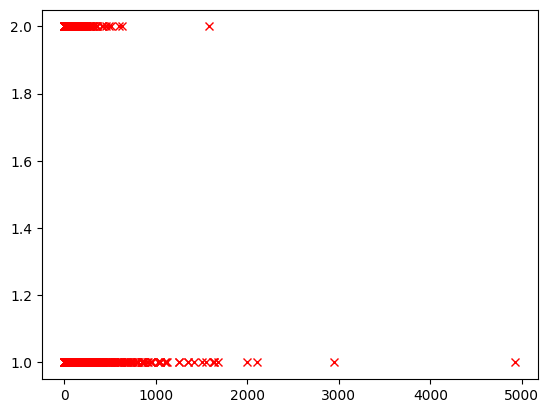

In [ ]:
plt.plot(X_train, y_train,'rx')

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# check model accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 7
True Negative 60
False Positive 6
False Negative 27


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.67

# apply no never-seen data

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')

In [ ]:
df_test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


In [ ]:
df_test_ran = ct.fit_transform(df_test)

In [ ]:
test_pred = model.predict(df_test_ran)

In [ ]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [1]:
a = 33
b = 200
if b > a:
  print("b is greater than a")

b is greater than a


In [2]:
a = 34
b = 21
if b > a:
  print("b is greater than a")